# Quality Metrics    
based on the following articles:
- https://heartbeat.comet.ml/5-regression-loss-functions-all-machine-learners-should-know-4fb140e9d4b0  
- https://medium.com/analytics-vidhya/loss-functions-to-evaluate-regression-models-8dac47e327e2

"If we can not measure something, we can not make it better"

It is not hard to create ML algorithm. For example to predict Demand, we can simply say that on the next week Demand will be the same as on the previous week.  
After algorithm created, the important question arise: how we can make it better?  
For that we need to measure Algorithm's performance.   

There are 2 types of functions, that can explain how close y_pred (predictions) to y_true (actual values)
- quality functions (measure similarity ) - we are trying to Maximize
- functions of losses (measure differences between actual values and predicted) - we are trying to Minimize

# Loss functions in Regression tasks

  ## MAE - Mean Absolute Error
  
![](./pic/1.png)

**MAE** - Mean Absolute Error = $\frac{SUM_n(a_i - y_i)}{n}$ (absolute difference) 
- y_true = 100,
- y_pred = 50 (underpredicted),

MAE under predicted = |100 - 50| / 1 = 50  

- y_true = 100,
- y_pred = 150 (over predicted)  


MAE over predicted = |100 - 150| / 1 = -50  


therefore Mean Absolute Error is equal for over predictions and under predictions

![](./pic/4.png)

### **MSE** - Mean Squared Error  
$MSE = SUM (true - pred)^2 / n$  
  
MSE under predicted = (100 - 50) ** 2 / 1 = 2500  
MSE over predicted = (100 - 150) ** 2 / 1 = 2500  
therefore MSE is equal for Over and Under predictions

![](./pic/3.png)

#### MSE vs. MAE (L2 loss vs L1 loss)  
In short, using MSE is easier to solve, but MAE is more robust to outliers.  
When we train ML model, our goal is to find the point that minimizes loss function. Of course, both functions reach the minimum when the prediction is exactly equal to the true value.  

In [71]:
from IPython.display import display
import numpy as np
# true: Array of true target variable
# pred: Array of predictions
def mse(true, pred): 
    return np.sum((true - pred)**2)
    
def mae(true, pred):
    return np.sum(np.abs(true - pred))
 
 # also available in sklearn 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


import seaborn as sns
from matplotlib import pyplot as plt

let's see the values of MAE and RMSE (Root Square of MSE to make it on the same scale) for 2 cases:
1. When predictions are close to True values and error has small variance among observations. 
2. When there is 1 outlier observation, and the error is high.

In [3]:
import pandas as pd

df_1 = pd.DataFrame({
    'id':      [1, 2, 3, 4, 5],
    'Error':   [0, 1, -2, -0.5, 1.5],
    '|Error|': [0, 1, 2, 0.5, 1.5],
    'Error^2': [0, 1, 4, 0.25, 2.25]
})
display(df_1)

MAE_1 = df_1['Error'].mean()
RMSE_1 = round(np.sqrt(df_1['Error^2'].mean()), 2)
print(f'MAE_1 = {MAE_1}, RMSE_1 = {RMSE_1}')

,id,Error,|Error|,Error^2
0,1,0.0,0.0,0.00
1,2,1.0,1.0,1.00
2,3,-2.0,2.0,4.00
3,4,-0.5,0.5,0.25
4,5,1.5,1.5,2.25


MAE_1 = 0.0, RMSE_1 = 1.22


In [4]:
df_2 = pd.DataFrame({
    'id':      [1, 2, 3, 4, 5],
    'Error':   [0, 1, 1, -2, 15],
    '|Error|': [0, 1, 1, 2, 15],
    'Error^2': [0, 1, 1, 4, 225]
})
display(df_2)
MAE_2 = df_2['Error'].mean()
RMSE_2 = round(np.sqrt(df_2['Error^2'].mean()), 2)
print(f'MAE_2 = {MAE_2}, RMSE_2 = {RMSE_2}')

,id,Error,|Error|,Error^2
0,1,0,0,0
1,2,1,1,1
2,3,1,1,1
3,4,-2,2,4
4,5,15,15,225


MAE_2 = 3.0, RMSE_2 = 6.8


what ddo we observe from this? and how this can help us to choose which loss function to use?
- Since MSE squares the error, value of error increases a lot if e>1. If we have outlier in our data, the value of e will be high. This will make the model with MSE loss give more weight to outliers than a model with MAE loss. In the example above, df_2 has outlier and RMSE pushes us to adjust the model to minimize that single outlier case at the expense of other common examples, which will reduce its overall performance :(
- MAE loss is useful when training data is corrupted with outliers (i.e. we erroneously receive unrealistically huge negative/positive values in our training environment, but not in testing environment)    
we can think about it like this: if we only had to give one prediction for all the observations: to minimize MSE that prediction would be the **mean** of all target values. But if we try to minimize MAE, that predictions would be **median** for all observations. Median is more robust to outliers than mean, which consequently makes MAE more robust to outliers than MSE.

One big problem in using MAE loss (especially for Neural Networks) is that its gradient is the same throughout, which means that the gradient will be large even for small loss values. This is a problem for learning. To fix this, we can use dynamic learning rate which deceases as we move closer to the minima.  
MSE behaves nicely in this case and will converge even with a fixed learning rate. The gradient of MSE loss is high for larger loss values and decreases as loss approaches 0, making it more precise at the end of training  

![](./pic/5.png)

#### Deciding which loss function to use  
If the outliers represent anomalies that are important for business and should be detected, then we should use MSE.  
On the other hand, if we believe that the outliers just represent corrupted data, then we should choose MAE as loss.

### RMSE - Root Mean Squared Error  
RMSE = $ \sqrt{MSE} $   
RMSE over predicted = 50  
RMSE under predicted = 50  
therefore, RMSE is equal for Over predicted and Under predicted

# Problem with both MAE and MSE:  
There can be cases where neither loss function gives desirable predictions. For example, if 90% of observations in our data have True = 150 and remaining 10% have True = 0-30.  
- Then a model with MAE as loss might predict 150 for all observations, ignoring 10% of outlier cases, as it will try to go towards median value.
- The model with MSE would give many predictions in range 0-30 as it will get skewed towards outliers. Both results are undesirable in many business cases.   
What we can do in Such cases? An easy fix would be to transform the target variables. Another way is to try a different Loss function. This is the motivation behind Huber Loss

### Huber Loss / Smooth Mean Absolute Error  
Huber Loss is less sensitive to outliers in data than the Squared Error. It is also differentiable at 0. It is basically Absolute error, which becomes quadratic when error is small. How small that error has to be to make quadratic depends on Hyperparameter Delta, which can be tuned  
![](./pic/6.png)  

  
the choice of Delta is critical, since it determines what errors we are considering as Outliers. Residual larger than delta are minimized with L1 (which is less sensitive to large outliers), which residuals smaller than delta are minimized "appropriately" with L2.

why use Huber loss?  
as we mentioned above using MAE for neural nets with its constantly large gradient can lead to missing minima at the end of training, using gradient descent. for MSE gradient deceases as the loss gets close to its minima, making it more precise  
Huber loss can be really helpful in such cases, as it curves around the minima which deceases the gradient. And it is more robust to outliers than MSE. Therefore, it combines good properties from both MSE and MAE. However, the problem with Huber loss is that we might need to train hyperparameter delta which is an iterative process

In [5]:
def huber_loss(true, pred, delta):
    huber_mse = 0.5 * np.square(true - pred)
    huber_mae = delta * (np.abs(true - pred) - 0.5 * (np.square(delta)))
    return np.where(np.abs(true - pred) <= delta, huber_mse, huber_mae)

true = 100
pred_under = 50
pred_over = 150

loss_under = huber_loss(true, pred_under, 20)
loss_over = huber_loss(true, pred_over, 20)
print(f'loss_under = {loss_under}')
print(f'loss_over = {loss_over}')

loss_under = -3000.0
loss_over = -3000.0


Huber loss - is symmetric

## Relative Absolute Error (RAE)  
Relative absolute error is computed by taking the total absolute error and dividing it by the absolute difference between the mean and actual value.

![](./pic/7.png)

RAE measure the performance of a predictive mode and is expressed in terms of Ratio (0-1) A good mode RAE = 0.  Error shows how the mean residual relates to the mean deviation of the target function from its mean.

In [14]:
def relative_absolute_error(true, pred):
    true_mean = np.mean(true)
    squared_error_num = np.sum(np.abs(true - pred))
    squared_error_den = np.sum(np.abs(true - true_mean))
    rae_loss = squared_error_num / squared_error_den
    return rae_loss

true_1 = 100
pred_under_1 = 90
pred_over_1 = 110
true_2 = 200
pred_under_2 = 190
pred_over_2 = 210
true = np.array([true_1, true_2])
pred_under = np.array([pred_under_1, pred_under_2])
pred_over = np.array([pred_over_1, pred_over_2])

loss_under = relative_absolute_error(true, pred_under)
loss_over = relative_absolute_error(true, pred_over)
print(f'loss_under = {loss_under}')
print(f'loss_over = {loss_over}')

loss_under = 0.2
loss_over = 0.2


### RMSLE - Root Mean Squared Logarithmic Error  
is calculated by applying log to the actual and the predicted values and then taking their differences. RMSLE is robust to outliers where the small and the large errors are treated evenly.  
It penalized the model more if the predicted value is less than the actual value while the model is less penalized if the predicted value is higher.  
It does not penalize high errors due to the log. Hence the model has a large penalty for underestimation than overestimation. This can be helpful in situations where we are not bothered by overestimation but underestimation is not acceptable.  

![](./pic/8.png)

In [11]:
def root_mean_squared_log_error(true, pred):
    square_error = np.square((np.log(true + 1) - np.log(pred + 1)))
    mean_square_log_error = np.mean(square_error)
    rmsle_loss = np.sqrt(mean_square_log_error)
    return rmsle_loss


true = 100
pred_under = 10
pred_over = 150

loss_under = root_mean_squared_log_error(true, pred_under)
loss_over = root_mean_squared_log_error(true, pred_over)
print(f'loss_under = {loss_under}')
print(f'loss_over = {loss_over}')

loss_under = 2.217225244042889
loss_over = 0.4021593199736646


# Log Cosh Loss  
Calculates the logarithm of the hyperbolic cosine of the error. This function is smoother than quadratic loss. It works like MSE but is not affected by the large prediction errors. It is quite similar to huber loss in the sense that it is a combination of both linear and quadratic scoring methods.  
![](./pic/9.png)

# Quantile Loss  
Qunatile regression loss is applied to predict quantiles.  
- Quantile is the value which determines how many values in the group falls below or above a certain limit.  
It estimates the conditional median of the response(dependent) variable across values of the predictor(independent) variables.  
Quantile Loss - is MAE in case of 50th percentile.  
It provides prediction intervals even for residuals with non-constant cariance and it does not assume a particular parametric distribution for the response.  
![](./pic/10.png)

In [59]:
# quantile loss function
def quantile_loss(true, pred, gamma):
    val1 = gamma * np.abs(true - pred)
    val2 = (1-gamma) * np.abs(true - pred)
    q_loss = np.where(true >= pred, val1, val2)
    return q_loss

<AxesSubplot: >

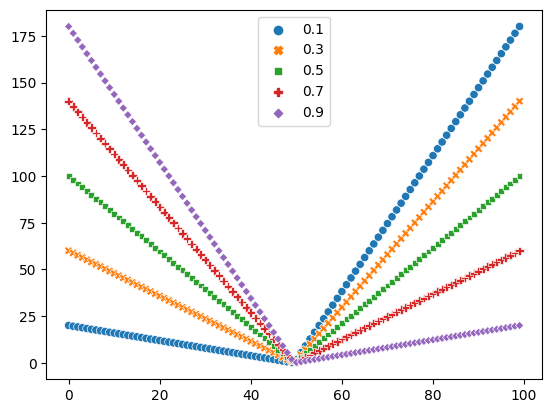

In [62]:
true = 100
predictions = np.linspace(true-200, true+200, 100)
scores = {}
for gamma_test in [0.1, 0.3, 0.5, 0.7, 0.9]:
    losses = quantile_loss(true, predictions, gamma_test)
    scores[gamma_test] = losses
df_losses = pd.DataFrame(scores)
sns.scatterplot(data=df_losses)

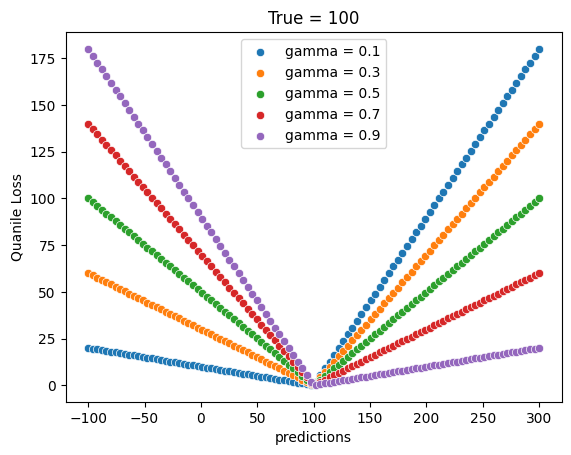

In [76]:
true = 100
predictions = np.linspace(true-200, true+200, 100)
df_predictions = pd.DataFrame(predictions)
df_predictions.columns = ['predictions']

scores = {}
for gamma_test in [0.1, 0.3, 0.5, 0.7, 0.9]:
    losses = quantile_loss(true, predictions, gamma_test)
    scores[gamma_test] = losses
df_losses = pd.DataFrame(scores)
df_losses = pd.merge(df_losses, df_predictions, left_index=True, right_index=True)
for gamma_test in [0.1, 0.3, 0.5, 0.7, 0.9]:
    sns.scatterplot(data=df_losses, x='predictions', y=gamma_test, label=f'gamma = {gamma_test}')
    plt.ylabel('Quanile Loss')
    plt.title('True = 100')

In [66]:

df_predictions

,predictions
0,-100.000000
1,-95.959596
2,-91.919192
3,-87.878788
4,-83.838384
...,...
95,283.838384
96,287.878788
97,291.919192
98,295.959596


In [81]:
# test function which return single value:
import numpy as np

def turnover_error(y_true: np.array, y_pred: np.array) -> float:
    val1 = 0.75 * np.abs(y_true - y_pred) # 0.75 - gamma
    val2 = (1-0.75) * np.abs(y_true - y_pred) # 0.75 - gamma
    if y_true >= y_pred:
        error = val1
    else:
        error = val2
    return error

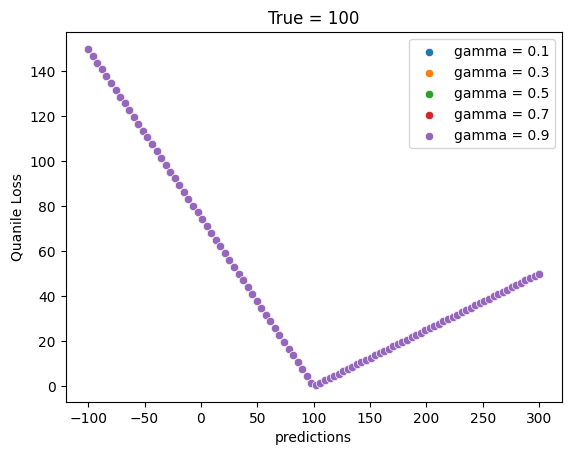

In [82]:
true = 100
predictions = np.linspace(true-200, true+200, 100)
df_predictions = pd.DataFrame(predictions)
df_predictions.columns = ['predictions']

scores = {}
for gamma_test in [0.1, 0.3, 0.5, 0.7, 0.9]:
    losses_list = []
    for prediction in predictions:
        loss_value = turnover_error(true, prediction)
        losses_list.append(loss_value)
    scores[gamma_test] = losses_list
df_losses = pd.DataFrame(scores)
df_losses = pd.merge(df_losses, df_predictions, left_index=True, right_index=True)
for gamma_test in [0.1, 0.3, 0.5, 0.7, 0.9]:
    sns.scatterplot(data=df_losses, x='predictions', y=gamma_test, label=f'gamma = {gamma_test}')
    plt.ylabel('Quanile Loss')
    plt.title('True = 100')